#1. Downloading dataset from Kaggle

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d whoosis/barcode-detection-annotated-dataset

100% 1.13G/1.14G [00:18<00:00, 70.6MB/s]
100% 1.14G/1.14G [00:18<00:00, 67.4MB/s]


In [5]:
!unzip barcode-detection-annotated-dataset.zip -d /content/barcode-detection-annotated-dataset

Archive:  barcode-detection-annotated-dataset.zip
  inflating: /content/barcode-detection-annotated-dataset/0/20201211_101_rgb.png  
  inflating: /content/barcode-detection-annotated-dataset/0/20201211_101_rgb.txt  
  inflating: /content/barcode-detection-annotated-dataset/0/20201211_1020_rgb.png  
  inflating: /content/barcode-detection-annotated-dataset/0/20201211_1020_rgb.txt  
  inflating: /content/barcode-detection-annotated-dataset/0/20201211_1021_rgb.png  
  inflating: /content/barcode-detection-annotated-dataset/0/20201211_1021_rgb.txt  
  inflating: /content/barcode-detection-annotated-dataset/0/20201211_1022_rgb.png  
  inflating: /content/barcode-detection-annotated-dataset/0/20201211_1022_rgb.txt  
  inflating: /content/barcode-detection-annotated-dataset/0/20201211_1024_rgb.png  
  inflating: /content/barcode-detection-annotated-dataset/0/20201211_1024_rgb.txt  
  inflating: /content/barcode-detection-annotated-dataset/0/20201211_102_rgb.png  
  inflating: /content/barcode

In [7]:
import os

classes = ['0', '1']

for i in classes:
    # Directory containing the files
    directory = '/content/barcode-detection-annotated-dataset/' + i
    # print(directory)

    # Get a list of all files in the directory
    files = os.listdir(directory)

    # Iterate over the files
    for file in files:
        # Check if the file is a .txt file
        if file.endswith('.txt'):
            # Construct the file path
            file_path = os.path.join(directory, file)
            # Remove the .txt file
            os.remove(file_path)

#2. Splitting dataset into train and test datasets

In [130]:
import os
import random
import shutil

# Set the paths to your class folders and the destination folders
class1_folder = "/content/barcode-detection-annotated-dataset/1"
class0_folder = "/content/barcode-detection-annotated-dataset/0"
train_folder = "/content/train"
test_folder = "/content/test"

# Set the desired train-test split ratio (e.g., 80% train, 20% test)
train_split_ratio = 0.8

def split_dataset(source_folder, train_destination, test_destination, train_ratio):
    # Create destination folders if they don't exist
    os.makedirs(train_destination, exist_ok=True)
    os.makedirs(test_destination, exist_ok=True)
    
    # Get the list of image files in the source folder
    image_files = os.listdir(source_folder)
    
    # Shuffle the image files randomly
    random.shuffle(image_files)
    
    # Calculate the number of images for the train and test sets
    num_train = int(len(image_files) * train_ratio)
    num_test = len(image_files) - num_train
    
    # Copy images to the train folder
    for filename in image_files[:num_train]:
        src_path = os.path.join(source_folder, filename)
        dst_path = os.path.join(train_destination, filename)
        shutil.copy(src_path, dst_path)
    
    # Copy images to the test folder
    for filename in image_files[num_train:]:
        src_path = os.path.join(source_folder, filename)
        dst_path = os.path.join(test_destination, filename)
        shutil.copy(src_path, dst_path)

# Split the dataset for class 1
split_dataset(class1_folder, os.path.join(train_folder, "1"), os.path.join(test_folder, "1"), train_split_ratio)

# Split the dataset for class 0
split_dataset(class0_folder, os.path.join(train_folder, "0"), os.path.join(test_folder, "0"), train_split_ratio)


#3. Installing dependencies

In [8]:
!pip install torch==2.0.0 -f https://download.pytorch.org/whl/cu111/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu111/torch_stable.html
  Using cached torch-2.0.0-cp310-cp310-manylinux1_x86_64.whl (619.9 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1
    Uninstalling torch-2.0.1:
      Successfully uninstalled torch-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.15.2 requires torch==2.0.1, but you have torch 2.0.0 which is incompatible.


In [9]:
!pip uninstall -y torchaudio torchdata torchtext torchvision

Found existing installation: torchvision 0.15.2
Uninstalling torchvision-0.15.2:
  Successfully uninstalled torchvision-0.15.2


In [10]:
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached torchvision-0.15.2-cp310-cp310-manylinux1_x86_64.whl (6.0 MB)
  Using cached torch-2.0.1-cp310-cp310-manylinux1_x86_64.whl (619.9 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0
    Uninstalling torch-2.0.0:
      Successfully uninstalled torch-2.0.0


In [181]:
!pip uninstall -y transformers accelerate
!pip install transformers accelerate

Found existing installation: transformers 4.29.2
Uninstalling transformers-4.29.2:
  Successfully uninstalled transformers-4.29.2
Found existing installation: accelerate 0.19.0
Uninstalling accelerate-0.19.0:
  Successfully uninstalled accelerate-0.19.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached transformers-4.29.2-py3-none-any.whl (7.1 MB)
  Using cached accelerate-0.19.0-py3-none-any.whl (219 kB)


In [11]:
!pip install -qU transformers torch datasets gdcm pydicom pinecone-client
!pip install openai-clip
!pip install gdcm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
!pip install datasets transformers torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#4. Loading train dataset

In [171]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image
from datasets import load_dataset

# Set the path to your dataset folder
#Train dataset
dataset_path = '/content/train'
train_dataset = load_dataset(dataset_path,split='train')


#Test dataset
dataset_path = '/content/test'
test_dataset = load_dataset(dataset_path,split='train')

Resolving data files:   0%|          | 0/826 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/208 [00:00<?, ?it/s]

In [172]:
train_dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 826
})

In [173]:
test_dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 208
})

In [156]:
# check how many labels/number of classes
num_classes = len(set(train_dataset['label']))
labels = train_dataset.features['label']
num_classes, labels

(2, ClassLabel(names=['0', '1'], id=None))

#5. Visualizing train dataset for class 0(without barcode) and class 1(with barcode)

Class 0 examples:


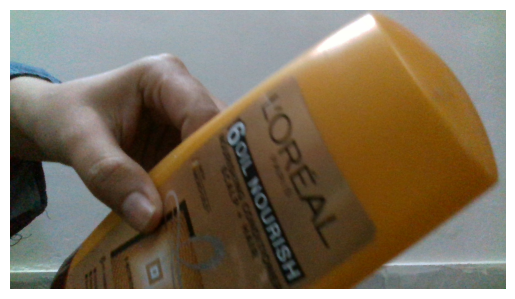

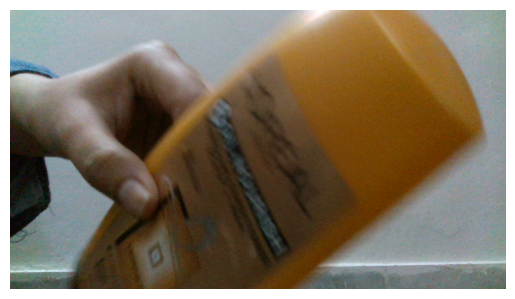

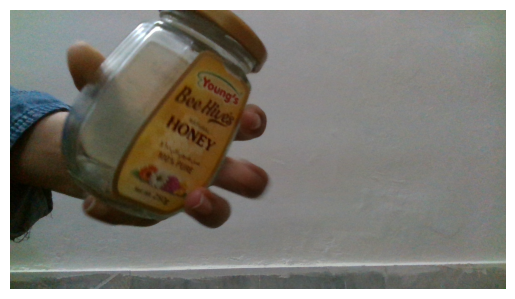

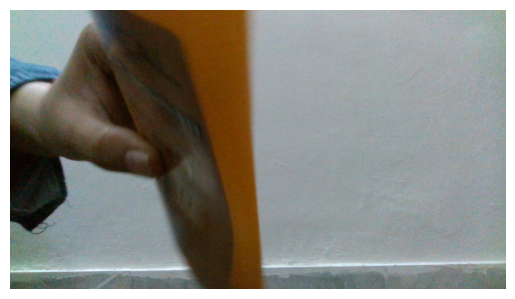

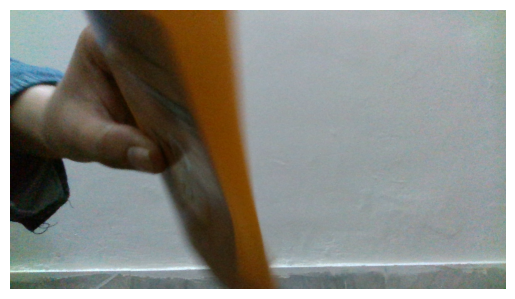

Class 1 examples:


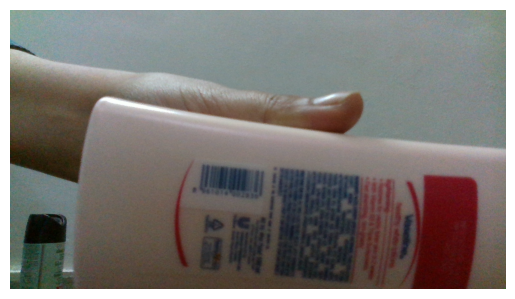

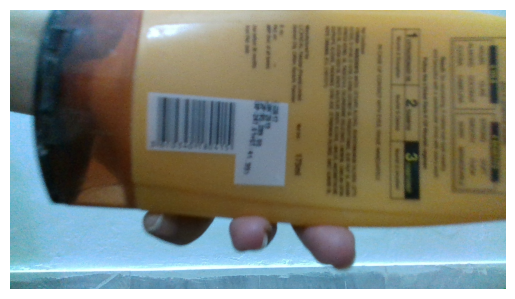

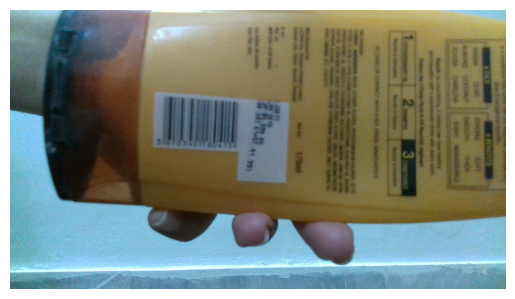

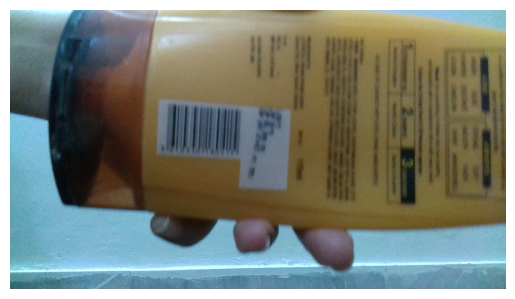

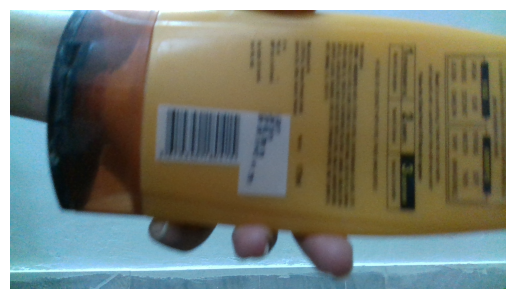

In [157]:
import matplotlib.pyplot as plt

num_images=5

# Get class 0 and class 1 examples from the dataset
class_0_examples = train_dataset.filter(lambda example: example['label'] == 0)['image']
class_1_examples = train_dataset.filter(lambda example: example['label'] == 1)['image']


# Display 5 images from class 0
print("Class 0 examples:")
for i in range(num_images):
    image_array = np.array(class_0_examples[i])
    plt.imshow(image_array)
    plt.axis('off')
    plt.show()

# Display 5 images from class 1
print("Class 1 examples:")
for i in range(num_images):
    image_array = np.array(class_1_examples[i])
    plt.imshow(image_array)
    plt.axis('off')
    plt.show()

#6. Loading ViT Feature Extractor

We use `google/vit-base-patch16-224-in21k` model from the Hugging Face Hub.

The model is named as so as it refers to base-sized architecture with patch resolution of 16x16 and fine-tuning resolution of 224x224.  

In [158]:
from transformers import ViTFeatureExtractor

# import model
model_id = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(
    model_id
)

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


You can see the feature extractor configuration by printing it

In [159]:
feature_extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

If we consider the first image, i.e., the airplane shown above, we can see the resulting tensor after passing the image through the feature extractor. 

In [160]:
example = feature_extractor(
    train_dataset[0]['image'],
    return_tensors='pt'
)
example

{'pixel_values': tensor([[[[ 0.1765,  0.2627,  0.3176,  ...,  0.0275,  0.0980,  0.1059],
          [ 0.2314,  0.2314,  0.2706,  ...,  0.1216,  0.0980,  0.1373],
          [ 0.1843,  0.1843,  0.2157,  ...,  0.1373,  0.1608,  0.1765],
          ...,
          [-0.4745, -0.5294, -0.5216,  ..., -0.2706, -0.2941, -0.3098],
          [-0.5294, -0.5216, -0.5059,  ..., -0.2706, -0.2784, -0.3020],
          [-0.5608, -0.4745, -0.4118,  ..., -0.2235, -0.3020, -0.4431]],

         [[ 0.4824,  0.4510,  0.4196,  ...,  0.2549,  0.2392,  0.2392],
          [ 0.4667,  0.4510,  0.4353,  ...,  0.2392,  0.2392,  0.2627],
          [ 0.4510,  0.4588,  0.4431,  ...,  0.2784,  0.2314,  0.2471],
          ...,
          [-0.3961, -0.3961, -0.4039,  ..., -0.1608, -0.1765, -0.1686],
          [-0.4275, -0.4196, -0.4353,  ..., -0.1843, -0.1922, -0.1843],
          [-0.4510, -0.4353, -0.4196,  ..., -0.1922, -0.1843, -0.1294]],

         [[ 0.4118,  0.3725,  0.3882,  ...,  0.1059,  0.1216,  0.1686],
          [ 0

In [161]:
example['pixel_values'].shape

torch.Size([1, 3, 224, 224])

In [162]:
# load in relevant libraries, and alias where appropriate
import torch

# device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [163]:
def preprocess(batch):
    # take a list of PIL images and turn them to pixel values
    inputs = feature_extractor(
        batch['image'],
        return_tensors='pt'
    )
    # # include the labels
    inputs['label'] = batch['label']
    return inputs

We can apply this to both the training and testing dataset.

In [174]:
# # transform the training dataset
prepared_train = train_dataset.with_transform(preprocess)
# # ... and the testing dataset
prepared_test = test_dataset.with_transform(preprocess)

In [175]:
prepared_train

Dataset({
    features: ['image', 'label'],
    num_rows: 826
})

In [176]:
prepared_train[0]

{'pixel_values': tensor([[[ 0.1765,  0.2627,  0.3176,  ...,  0.0275,  0.0980,  0.1059],
          [ 0.2314,  0.2314,  0.2706,  ...,  0.1216,  0.0980,  0.1373],
          [ 0.1843,  0.1843,  0.2157,  ...,  0.1373,  0.1608,  0.1765],
          ...,
          [-0.4745, -0.5294, -0.5216,  ..., -0.2706, -0.2941, -0.3098],
          [-0.5294, -0.5216, -0.5059,  ..., -0.2706, -0.2784, -0.3020],
          [-0.5608, -0.4745, -0.4118,  ..., -0.2235, -0.3020, -0.4431]],
 
         [[ 0.4824,  0.4510,  0.4196,  ...,  0.2549,  0.2392,  0.2392],
          [ 0.4667,  0.4510,  0.4353,  ...,  0.2392,  0.2392,  0.2627],
          [ 0.4510,  0.4588,  0.4431,  ...,  0.2784,  0.2314,  0.2471],
          ...,
          [-0.3961, -0.3961, -0.4039,  ..., -0.1608, -0.1765, -0.1686],
          [-0.4275, -0.4196, -0.4353,  ..., -0.1843, -0.1922, -0.1843],
          [-0.4510, -0.4353, -0.4196,  ..., -0.1922, -0.1843, -0.1294]],
 
         [[ 0.4118,  0.3725,  0.3882,  ...,  0.1059,  0.1216,  0.1686],
          [ 

In [177]:
prepared_test

Dataset({
    features: ['image', 'label'],
    num_rows: 208
})

In [178]:
prepared_test[0]

{'pixel_values': tensor([[[ 0.1529,  0.1137,  0.1059,  ..., -0.0196, -0.0118, -0.0667],
          [ 0.1059,  0.0902,  0.0824,  ..., -0.0196, -0.0196, -0.0196],
          [ 0.1137,  0.0980,  0.0824,  ..., -0.0039, -0.0039,  0.0196],
          ...,
          [-0.5843, -0.4980, -0.5294,  ..., -0.3569, -0.3882, -0.3882],
          [-0.5059, -0.5294, -0.5373,  ..., -0.3569, -0.3961, -0.3961],
          [-0.4745, -0.5608, -0.5686,  ..., -0.3490, -0.4353, -0.5294]],
 
         [[ 0.2471,  0.2235,  0.2314,  ...,  0.0902,  0.0902,  0.0667],
          [ 0.2078,  0.2078,  0.2235,  ...,  0.0667,  0.0431,  0.0588],
          [ 0.2314,  0.2235,  0.2235,  ...,  0.0588,  0.0353,  0.0510],
          ...,
          [-0.5294, -0.5059, -0.4980,  ..., -0.3176, -0.3255, -0.3490],
          [-0.5765, -0.5294, -0.4980,  ..., -0.3333, -0.3490, -0.3569],
          [-0.6000, -0.5608, -0.4902,  ..., -0.3412, -0.3569, -0.2784]],
 
         [[ 0.1451,  0.0745,  0.0902,  ..., -0.1373, -0.0980, -0.1216],
          [ 

Now, whenever you get an example from the dataset, the transform will be applied in real time (on both samples and slices).

#7. Model Fine-Tuning

In this section, we are going to build the Trainer, which is a feature-complete training and eval loop for PyTorch, optimized for HuggingFace 🤗 Transformers.

We need to define all of the arguments that it will include:
* training and testing dataset
* feature extractor
* model
* collate function
* evaluation metric
* ... other training arguments.

The collate function is useful when dealing with lots of data. Batches are lists of dictionaries, so collate will help us create batch tensors.

In [182]:
def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['label'] for x in batch])
    }

Let's now define the evaluation metric we are going to use to compare prediction with actual labels. We will use the *accuracy evaluation metric*. 

Accuracy is defined as the proportion of correct predictions (True Positive ($TP$) and True Negative ($TN$)) among the total number of cases processed ($TP$, $TN$, False Positive ($FP$), and False Negative ($FN$)). 

$$Accuracy = \frac{(TP + TN)}{(TP + TN + FP + FN)}$$    

Below, we are using accuracy within the ```compute_metrics``` function.

In [183]:
import numpy as np
from datasets import load_metric

# accuracy metric
metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(
        predictions=np.argmax(p.predictions, axis=1),
        references=p.label_ids
    )

The last thing consists of defining ```TrainingArguments```.

Most of these are pretty self-explanatory, but one that is quite important here is ```remove_unused_columns=False```. This one will drop any features not used by the model's call function. By default it's True because usually it's ideal to drop unused feature columns, making it easier to unpack inputs into the model's call function. But, in our case, we need the unused features ('image' in particular) in order to create 'pixel_values'.

We have chosen a batch size equal to 16, 100 evaluation steps, and a learning rate of $2e^{-4}$.

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="/content/drive/MyDrive/ViT",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=1,
  save_steps=1,
  eval_steps=1,
  logging_steps=1,
  learning_rate=2e-4,
  save_total_limit=1,
  remove_unused_columns=False,
  push_to_hub=False,
  load_best_model_at_end=True
)

We can now load the pre-trained model. We'll add ```num_labels``` on init so the model creates a classification head with the right number of units.

In [186]:
from transformers import ViTForImageClassification


model = ViTForImageClassification.from_pretrained(
    model_id,  # classification head
    num_labels=2
)

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [187]:
model.to(device)

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

We can see the characteristics of our model.

Now, all instances can be passed to ```Trainer```.

In [193]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_train,
    tokenizer=feature_extractor,
)

We can save our trained model.

In [197]:
train_results = trainer.train()

Exception ignored in: <function _xla_gc_callback at 0x7f9e8819e050>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 1>:1                                                                              │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/trainer.py:1664 in train                    │
│                                                                                                  │
│   1661 │   │   inner_training_loop = find_executable_batch_size(                                 │
│   1662 │   │   │   self._inner_training_loop, self._train_batch_size, args.auto_find_batch_size  │
│   1663 │   │   )                                                                                 │
│ ❱ 1664 │   │   return inner_training_loop(                                                       │
│   1665 │   │   │   args=args,                                                                    │
│   1666 │   │   │   resume_from_checkpoint=resume_from_checkpoint,                                │
│   1667 │   │   │   trial=trial,                                                                  │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/trainer.py:1940 in _inner_training_loop     │
│                                                                                                  │
│   1937 │   │   │   │   │   with model.no_sync():                                                 │
│   1938 │   │   │   │   │   │   tr_loss_step = self.training_step(model, inputs)                  │
│   1939 │   │   │   │   else:                                                                     │
│ ❱ 1940 │   │   │   │   │   tr_loss_step = self.training_step(model, inputs)                      │
│   1941 │   │   │   │                                                                             │
│   1942 │   │   │   │   if (                                                                      │
│   1943 │   │   │   │   │   args.logging_nan_inf_filter                                           │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/trainer.py:2735 in training_step            │
│                                                                                                  │
│   2732 │   │   │   return loss_mb.reduce_mean().detach().to(self.args.device)                    │
│   2733 │   │                                                                                     │
│   2734 │   │   with self.compute_loss_context_manager():                                         │
│ ❱ 2735 │   │   │   loss = self.compute_loss(model, inputs)                                       │
│   2736 │   │                                                                                     │
│   2737 │   │   if self.args.n_gpu > 1:                                                           │
│   2738 │   │   │   loss = loss.mean()  # mean() to average on multi-gpu parallel training        │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/trainer.py:2767 in compute_loss             │
│                                                                                                  │
│   2764 │   │   │   labels = inputs.pop("labels")                                                 │
│   2765 │   │   else:                                                                             │
│   2766 │   │   │   labels = None                                                                 │
│ ❱ 2767 │   │   outputs = model(**inputs)                                                         │
│   2768 │   │   # Save past state if it exists              

In [198]:
# save tokenizer with the model
trainer.save_model('/content/drive/MyDrive/ViT/finetune_model.pt')
# trainer.log_metrics("train", train_results.metrics)
# trainer.save_metrics("train", train_results.metrics)
# save the trainer state
trainer.save_state()

#8. Model Evaluation

We can now evaluate our model using the accuracy metric defined above...

In [ ]:
metrics = trainer.evaluate( )
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

Model accuracy is pretty good. Let's have a look to an example. We can pick the first image in our testing dataset and see if the predicted label is correct.

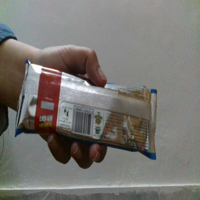

In [208]:
# show the first image of the testing dataset
image = test_dataset["image"][200].resize((200,200))
image

The image is not very clear, even when resized. Let's extract the actual label.

In [210]:
# extract the actual label of the first image of the testing dataset
actual_label = test_dataset["label"][200]

labels = test_dataset.features['label']
actual_label, labels.names[actual_label]

(1, '1')

It looks like the image represents a cat. Let's now see what our model has predicted. Given we saved it on the HuggingFace Hub, we first need to import it. We can use ViTForImageClassification and ViTFeatureExtractor to import the model and extract its features. We would need the predicted pixel values "pt".

In [211]:
from transformers import ViTForImageClassification, ViTFeatureExtractor

# import our fine-tuned model
model_name_or_path = '/content/drive/MyDrive/ViT/finetune_model.pt'
model_finetuned = ViTForImageClassification.from_pretrained(model_name_or_path)
# import features
feature_extractor_finetuned = ViTFeatureExtractor.from_pretrained(model_name_or_path)

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [212]:
inputs = feature_extractor_finetuned(image, return_tensors="pt")

with torch.no_grad():
    logits = model_finetuned(**inputs).logits

We can now see what is our predicted label. Do extract it, we can use the argmax function.

In [213]:
predicted_label = logits.argmax(-1).item()
labels = test_dataset.features['label']
labels.names[predicted_label]

'1'

And the answer is cat. Which is what we would expect.

#9. References

[Article](https://pinecone.io/learn/vision-transformers/)

[1] Dosovitskiy et al., [An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale](https://arxiv.org/abs/2010.11929), 2021, CV.

[2] Vaswani et al., [Attention Is All You Need](https://arxiv.org/abs/1706.03762), 2017.

[3] Saeed M., [A Gentle Introduction to Positional Encoding in Transformer Models, Part 1](https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/), 2022, Attention, Machine Learning Mastery.